<h1><center>Credit Card Fraud Detection</center></h1>

### Context

- It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Content

- The datasets contains transactions made by credit cards in September 2013 by european cardholders. 
- This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 
- The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
- It contains only numerical input variables which are the result of a PCA transformation. 
- Unfortunately, due to confidentiality issues, we cannot provide the original features 
- Features V1, V2, ... V28 are the principal components obtained with PCA
- The only features which have not been transformed with PCA are 'Time' and 'Amount'. 
- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
- The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. - - --- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Task
- Identify fraudulent credit card transactions.

## Importing necessary packages

In [1]:
#General Libraries

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import string
import warnings
pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)
pd.options.display.max_colwidth = 300

#For model building and evaluation
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [64]:
#Reading and getting first glance of data:-

df=pd.read_csv('D:/Datasets/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [37]:
df.shape

(172441, 31)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172441 entries, 0 to 172440
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    172441 non-null  float64
 1   V1      172441 non-null  float64
 2   V2      172440 non-null  float64
 3   V3      172440 non-null  float64
 4   V4      172440 non-null  float64
 5   V5      172440 non-null  float64
 6   V6      172440 non-null  float64
 7   V7      172440 non-null  float64
 8   V8      172440 non-null  float64
 9   V9      172440 non-null  float64
 10  V10     172440 non-null  float64
 11  V11     172440 non-null  float64
 12  V12     172440 non-null  float64
 13  V13     172440 non-null  float64
 14  V14     172440 non-null  float64
 15  V15     172440 non-null  float64
 16  V16     172440 non-null  float64
 17  V17     172440 non-null  float64
 18  V18     172440 non-null  float64
 19  V19     172440 non-null  float64
 20  V20     172440 non-null  float64
 21  V21     17

- We can observe that data-set is pretty clean with only numerical and continious columns 
- It has no null values
- It is pretty big with more than seventy-three thousand rows and 31 columns.

In [39]:
#Checking imbalancement:

d=df['Class'].value_counts().reset_index()
d.rename(columns={'index':'Class','Class':'Values'},inplace=True)
d['Precent']=d['Values']/df.shape[0]*100
d['Class']=['Non-fraud' if i==0 else "Fraud" for i in d['Class']]
d

,Class,Values,Precent
0,Non-fraud,172080,99.790653
1,Fraud,360,0.208767


- As we can clearly see that data-set is heavily imbalanced as a event of fraud is highly rare or uncommon.

In [65]:
#Seperating the Fraud and the ok values 
fraud = df[df['Class']==1]
ok = df[df['Class']==0]

In [49]:
#Analyzing amount of money used in fraud and non-fraud transaction.
#For fraud transactions.
f=fraud.Amount.describe().reset_index()
o=ok.Amount.describe().reset_index()
tran=pd.merge(f,o,on='index')
tran.rename(columns={'Amount_x':'Fraud','Amount_y':'Non-Fraud'},inplace=True)
tran

,index,Fraud,Non-Fraud
0,count,227.000000,142177.000000
1,mean,136.912555,87.874089
2,std,296.445857,248.096253
3,min,0.000000,0.000000
4,25%,1.000000,5.630000
5,50%,8.640000,22.000000
6,75%,105.350000,77.280000
7,max,2125.870000,19656.530000


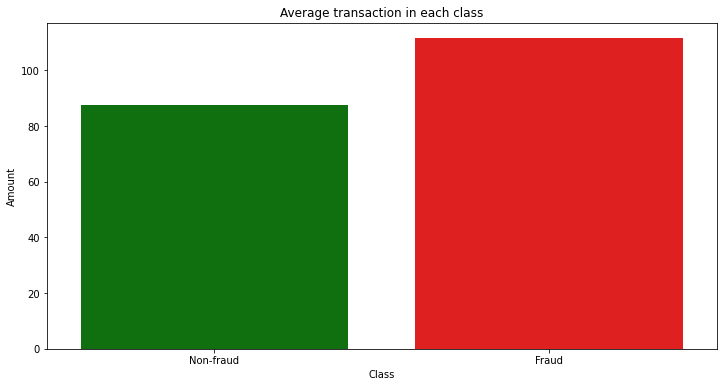

In [42]:
gr1=df.groupby('Class')['Amount'].mean().reset_index()
gr1['Class']=['Non-fraud' if i==0 else "Fraud" for i in gr1['Class']]
clrs = ['red' if x == "Fraud" else 'green' for x in gr1['Class']]
plt.figure(figsize=(12,6))
sns.barplot(data=gr1,x='Class',y='Amount',palette=clrs)
plt.title("Average transaction in each class")
plt.ylabel('Amount')
plt.show()

- From the above graphs we observe that average amount in fraud transactions is higher. Really?


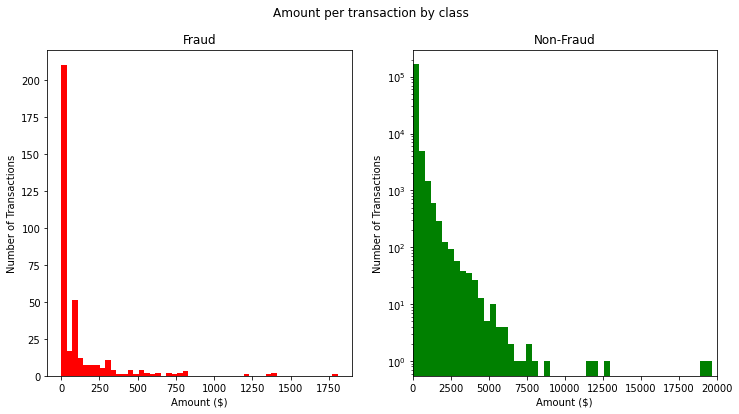

In [43]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.suptitle('Amount per transaction by class')
bins = 50
plt.hist(fraud.Amount, bins = bins,color='red')
plt.title('Fraud')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.subplot(1,2,2)
plt.hist(ok.Amount, bins = bins,color='green')
plt.title('Non-Fraud')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

- From the above graph we can clearly observe that fraud transaction are mostly with lesser amount except few outliers 
- Due to few outliers we in above graph saw higher mean of fraud transactions.

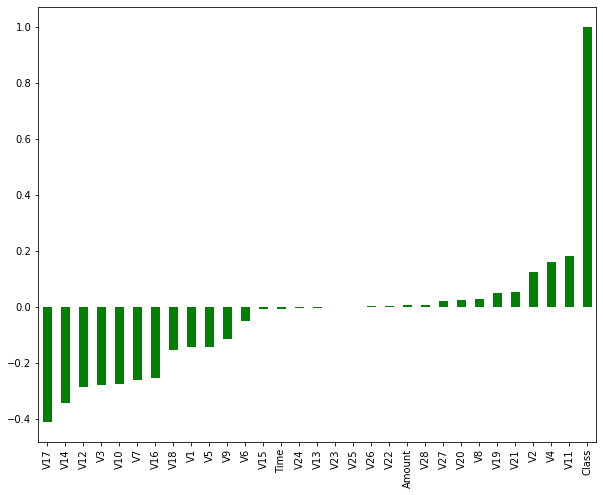

In [44]:
#SalesPrice correlation with all the feature
plt.figure(figsize=(10,8))
c=df.corr()['Class'].sort_values().plot(kind='bar',color='green')

In [66]:
#Normalizing amount column:-
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['Amount'] = sc.fit_transform(np.array(df['Amount']).reshape(-1,1))

#Dropping unnecessary cols:-
df.drop(columns='Time',inplace=True)

In [51]:
df.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.52302,0.358468,0.07005,...,-0.075208,0.045536,0.380739,0.02344,-2.220686,-0.201146,0.066501,0.22118,-0.347168,0


## Treatment of imbalanced data:-
### Undersampling
     - 1) Random undersampling
     - 2) Undersampling using Imblearn
     - 3) NearMiss
- Advantages:-
Since the sample size of majority class is decreased by under sampling the training time and complexity of the model is decreased to a large extent.
- Disadvantages:-
Since the data points are reduced, it might happen that during the removal of data points many important points get deleted which decreases the prediction capability of the fitted model, due to poor training.

### Oversampling
    - 1) Random oversampling
    - 2) Oversampling using Imblearn
    - 3) SMOTE(Synthetic Minority Oversampling)
- Advantages:-
Since the number of data points in minority class increases there is a high possibility for the model to learn from the data points in minority class of training set.
- Disadvantages:-
Uncontrolled oversampling can lead to more training time and model complexity thus diminishing the predictive capability of the model.

In [52]:
# Dividing class dataset into fraud and non-fraud.
df_fraud = df[df['Class']==1]
df_ok = df[df['Class']==0]

#Getting class count.
ok,fraud = df['Class'].value_counts()

# Undersampling
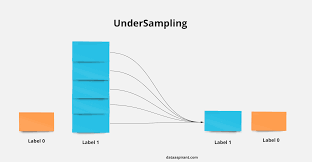

## 1) Random Undersampling

In [48]:
#Undersampling
df_ok_down = df_ok.sample(fraud)#specify the number of sample we need
df_down = pd.concat([df_ok_down,df_fraud],axis=0)
df_down.shape

(720, 30)

In [49]:
#Model building
X=df_down.iloc[:,:-1]
Y=df_down.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(576, 29) (144, 29) (576,) (144,)


Precision:- 0.9710144927536232
Recall:- 0.881578947368421
Kappa score:- 0.8475750577367206


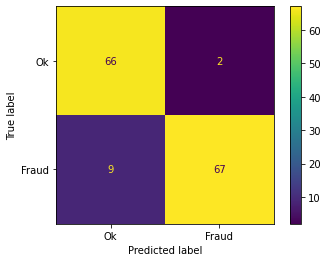

In [50]:
#KNN Score

knn = KNeighborsClassifier(n_neighbors=3)
kpred=knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

#Confusion Matrix and precision
mylabels=['Ok','Fraud']
P_knn_rdown=metrics.precision_score(y_test,y_pred)
R_knn_rdown=metrics.recall_score(y_test,y_pred)
k_knn_rdown = cohen_kappa_score(y_test, y_pred)
c_knn_rdown=sklearn.metrics.classification_report(y_test,y_pred,target_names=mylabels)

sklearn.metrics.plot_confusion_matrix(kpred,x_test,y_test,display_labels=mylabels)
print("Precision:-",P_knn_rdown)
print("Recall:-",R_knn_rdown)
print("Kappa score:-",k_knn_rdown)

- Here in confusion matrix we can observe:-
    - The upper right box is type 1 error(False +ve) i.e. transaction which were valid but predicted fraud which are 2.
    - The lower left box is type 2 error(False -ve) i.e. transaction which were fraud but predicted valid which are 9.
- In this problem statement our goal is to reduce type 2 error i.e falsely predicted fraud tran. as valid.
- Hence we need to focus on increasing recall value which is TP/TP+FN.
    

Precision:- 0.971830985915493
Recall:- 0.9078947368421053
Kappa score:- 0.8750963762528913


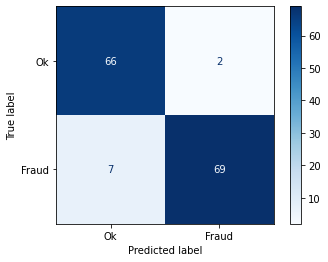

In [51]:
#Logistic regression

log = LogisticRegression()
pred=log.fit(x_train,y_train)
y_pred=log.predict(x_test)

#Confusion Matrix and precision
P_log_rdown=metrics.precision_score(y_test,y_pred)
R_log_rdown=metrics.recall_score(y_test,y_pred)
k_log_rdown=cohen_kappa_score(y_test, y_pred)
c_log_rdown=sklearn.metrics.classification_report(y_test,y_pred,target_names=mylabels)

sklearn.metrics.plot_confusion_matrix(pred,x_test,y_test,display_labels=mylabels,cmap=plt.cm.Blues)
print("Precision:-",P_log_rdown)
print("Recall:-",R_log_rdown)
print("Kappa score:-",k_log_rdown)

## 2) Undersampling using imblearn

In [52]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, replacement=True)
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
x_rus, y_rus = rus.fit_resample(X, Y)
print(x_rus.shape,y_rus.shape)

(720, 29) (720,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [53]:
#Splitting
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=0.2,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(576, 29) (144, 29) (576,) (144,)


Precision:- 0.935064935064935
Recall:- 0.9473684210526315
Kappa score:- 0.8745158791634392


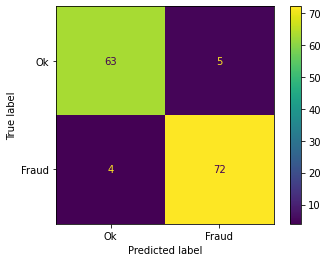

In [54]:
#KNN Score
knn = KNeighborsClassifier(n_neighbors=3)
kpred=knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

#Confusion Matrix and precision
P_knn_rup=metrics.precision_score(y_test,y_pred)
R_knn_rup=metrics.recall_score(y_test,y_pred)
k_knn_rup = cohen_kappa_score(y_test, y_pred)
c_knn_idown=sklearn.metrics.classification_report(y_test,y_pred,target_names=mylabels)

sklearn.metrics.plot_confusion_matrix(kpred,x_test,y_test,display_labels=mylabels)
print("Precision:-",P_knn_rup)
print("Recall:-",R_knn_rup)
print("Kappa score:-",k_knn_rup)

Precision:- 0.9605263157894737
Recall:- 0.9605263157894737
Kappa score:- 0.9164086687306502


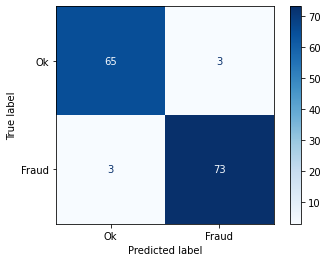

In [55]:
#Logistic regression
log = LogisticRegression()
pred=log.fit(x_train,y_train)
y_pred=log.predict(x_test)

#Confusion Matrix and precision
P_log_rup=metrics.precision_score(y_test,y_pred)
R_log_rup=metrics.recall_score(y_test,y_pred)
k_log_rup=cohen_kappa_score(y_test, y_pred)
c_log_idown=sklearn.metrics.classification_report(y_test,y_pred,target_names=mylabels)

sklearn.metrics.plot_confusion_matrix(pred,x_test,y_test,display_labels=mylabels,cmap=plt.cm.Blues)
print("Precision:-",P_log_rup)
print("Recall:-",R_log_rup)
print("Kappa score:-",k_log_rup)

## 3)Near Miss
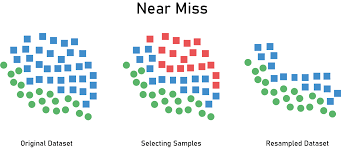
- It first finds the distances between all instances of the majority class and the instances of the minority class.
- Then, n instances of the majority class that have the smallest distances to those in the minority class are selected.
- If there are k instances in the minority class, the nearest method will result in k*n instances of the majority class.
    - Version 1: In the first version, the data is balanced by calculating the average minimum distance between the larger distribution and three closest smaller distributions.

    - Version 2: Here, the data is balanced by calculating the average minimum distance between the larger distribution and three furthest smaller distributions. 

    - Version 3: Here, the smaller class instances are considered and m neighbours are stored. Then the distance between this and the larger distribution is taken and the largest distance is eliminated.

Default is version 1.

In [56]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_nm, y_nm = nm.fit_resample(X, Y)
print(x_nm.shape,y_nm.shape)

(720, 29) (720,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [57]:
#Splitting
x_train,x_test,y_train,y_test=train_test_split(x_nm,y_nm,test_size=0.2,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(576, 29) (144, 29) (576,) (144,)


Precision:- 0.9710144927536232
Recall:- 0.881578947368421
Kappa score:- 0.8475750577367206


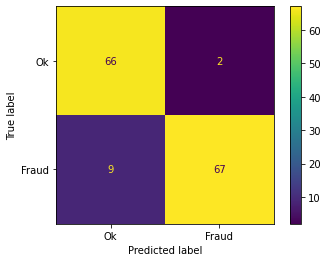

In [58]:
#KNN Score
knn = KNeighborsClassifier(n_neighbors=3)
kpred=knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

#Confusion Matrix and precision
P_knn_nm=metrics.precision_score(y_test,y_pred)
R_knn_nm=metrics.recall_score(y_test,y_pred)
k_knn_nm=cohen_kappa_score(y_test, y_pred)
c_knn_nm=sklearn.metrics.classification_report(y_test,y_pred,target_names=mylabels)

sklearn.metrics.plot_confusion_matrix(kpred,x_test,y_test,display_labels=mylabels)
print("Precision:-",P_knn_nm)
print("Recall:-",R_knn_nm)
print("Kappa score:-",k_knn_nm)

Precision:- 0.9714285714285714
Recall:- 0.8947368421052632
Kappa score:- 0.8613251155624038


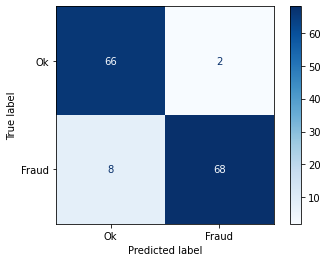

In [59]:
#Logistic regression
log = LogisticRegression()
pred=log.fit(x_train,y_train)
y_pred=log.predict(x_test)

#Confusion Matrix and precision
P_log_nm=metrics.precision_score(y_test,y_pred)
R_log_nm=metrics.recall_score(y_test,y_pred)
k_log_nm=cohen_kappa_score(y_test, y_pred)
c_log_nm=sklearn.metrics.classification_report(y_test,y_pred,target_names=mylabels)

sklearn.metrics.plot_confusion_matrix(pred,x_test,y_test,display_labels=mylabels,cmap=plt.cm.Blues)
print("Precision:-",P_log_nm)
print("Recall:-",R_log_nm)
print("Kappa score:-",k_log_nm)

## Overview of performances of models after Undersampling with different methods:-

In [60]:
print('KNN Random under:-\n\n',c_knn_rdown,'\n',
      'Logistic Random under:-\n\n',c_log_rdown,'\n',
      'KNN Imblearn under:-\n\n',c_knn_idown,'\n', 
      'Logistic Imblearn under:-\n\n',c_log_idown,'\n',
      'KNN NearMiss:-\n\n',c_knn_nm,'\n',
      'Logistic NearMiss:-\n\n',c_log_nm)

KNN Random under:-

               precision    recall  f1-score   support

          Ok       0.88      0.97      0.92        68
       Fraud       0.97      0.88      0.92        76

    accuracy                           0.92       144
   macro avg       0.93      0.93      0.92       144
weighted avg       0.93      0.92      0.92       144
 
 Logistic Random under:-

               precision    recall  f1-score   support

          Ok       0.90      0.97      0.94        68
       Fraud       0.97      0.91      0.94        76

    accuracy                           0.94       144
   macro avg       0.94      0.94      0.94       144
weighted avg       0.94      0.94      0.94       144
 
 KNN Imblearn under:-

               precision    recall  f1-score   support

          Ok       0.94      0.93      0.93        68
       Fraud       0.94      0.95      0.94        76

    accuracy                           0.94       144
   macro avg       0.94      0.94      0.94       144


# Oversampling
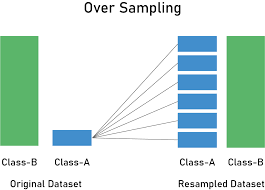

## 1) Random Oversampling

In [40]:
#Oversampling
df_fraud_up = df_fraud.sample(ok,replace=True)#specify the number of sample we need
df_up = pd.concat([df_fraud_up,df_ok],axis=0)
df_up.shape

(568630, 30)

In [41]:
#Model building
#Dataset is too big to haldle by my local system so taking a sample of it.
df_up= df_up.sample(frac = 0.1,random_state=1)
X=df_up.iloc[:,:-1]
Y=df_up.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(45490, 29) (11373, 29) (45490,) (11373,)


Precision:- 0.9950885809507104
Recall:- 1.0


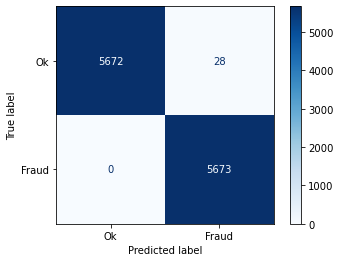

In [44]:
#KNN Score
knn = KNeighborsClassifier(n_neighbors=3)
kpred=knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

#Confusion Matrix and precision
P_knn_rup =metrics.precision_score(y_test,y_pred)
R_knn_rup=metrics.recall_score(y_test,y_pred)
c_knn_rup =sklearn.metrics.classification_report(y_test,y_pred)

print("Precision:-",P_knn_rup)
print("Recall:-",R_knn_rup) 
sklearn.metrics.plot_confusion_matrix(kpred,x_test,y_test,display_labels=mylabels,cmap=plt.cm.Blues)

Precision score:- 0.9724958186210741
Recall:- 0.9224396263000176


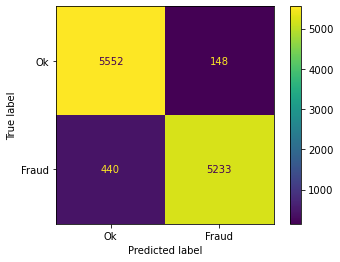

In [45]:
#Logistic regression
log = LogisticRegression()
pred=log.fit(x_train,y_train)
y_pred=log.predict(x_test)

#Confusion Matrix and precision
R_log_rup=metrics.recall_score(y_test,y_pred)
P_log_rup=metrics.precision_score(y_test,y_pred)
c_log_rup =sklearn.metrics.classification_report(y_test,y_pred)

print("Precision score:-",P_log_rup)
print("Recall:-",R_log_rup)                                   
sklearn.metrics.plot_confusion_matrix(pred,x_test,y_test,display_labels=mylabels)

## 4)Upsampling using imblearn

In [54]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
df=df.sample(frac = 0.1,random_state=1)
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
x_ros, y_ros = ros.fit_resample(X,Y)
print(x_ros.shape,y_ros.shape)

(14216, 29) (14216,)


In [55]:
#Splitting
x_train,x_test,y_train,y_test=train_test_split(x_ros,y_ros,test_size=0.2,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(11372, 29) (2844, 29) (11372,) (2844,)


Precision 0.9986168741355463
Recall:- 1.0


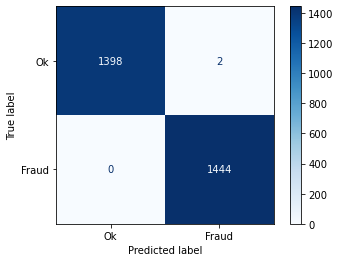

In [56]:
#KNN Score
knn = KNeighborsClassifier(n_neighbors=3)
kpred=knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

#Confusion Matrix and precision
P_knn_imbup=metrics.precision_score(y_test,y_pred)
R_knn_imbup=metrics.recall_score(y_test,y_pred)
c_knn_imbup =sklearn.metrics.classification_report(y_test,y_pred)

print("Precision",P_knn_imbup)
print("Recall:-",R_knn_imbup)
sklearn.metrics.plot_confusion_matrix(kpred,x_test,y_test,display_labels=mylabels,cmap=plt.cm.Blues)

Precision score:- 0.9972375690607734
Recall:- 1.0


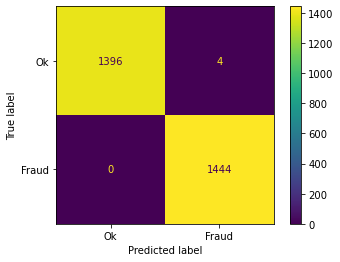

In [57]:
#Logistic regression
log = LogisticRegression()
pred=log.fit(x_train,y_train)
y_pred=log.predict(x_test)

#Confusion Matrix and precision
P_log_imbup=metrics.precision_score(y_test,y_pred)
R_log_imbup=metrics.recall_score(y_test,y_pred)
c_log_imbup =sklearn.metrics.classification_report(y_test,y_pred)

print("Precision score:-",P_log_imbup)
print("Recall:-",R_log_imbup)
sklearn.metrics.plot_confusion_matrix(pred,x_test,y_test,display_labels=mylabels)

## 5) SMOTE(Synthetic Minority Oversampling)
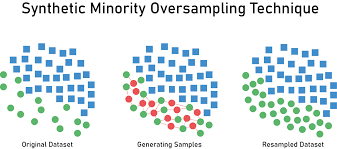
- It uses KNN algorithm
- It chooses a minority class as the input vector
- It then finds its k nearest neighbors specified in a argument in the SMOTE() function
- Chooses one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
- Repeats the steps until data is balanced"

In [58]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote , y_smote = smote.fit_resample(X,Y)
print(x_smote.shape,y_smote.shape)

(14216, 29) (14216,)


In [59]:
#Splitting
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(11372, 29) (2844, 29) (11372,) (2844,)


Precision 0.9986168741355463
Recall:- 1.0


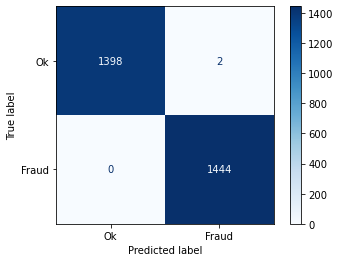

In [60]:
#KNN Score
knn = KNeighborsClassifier(n_neighbors=3)
kpred=knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

#Confusion Matrix and precision
P_knn_smo=metrics.precision_score(y_test,y_pred)
R_knn_smo=metrics.recall_score(y_test,y_pred)
c_knn_smo =sklearn.metrics.classification_report(y_test,y_pred)

print("Precision",P_knn_smo)
print("Recall:-",R_knn_smo)
sklearn.metrics.plot_confusion_matrix(kpred,x_test,y_test,display_labels=mylabels,cmap=plt.cm.Blues)

Precision score:- 0.9979267449896337
Recall:- 1.0


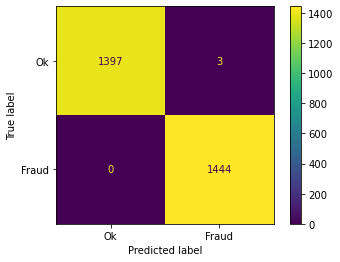

In [61]:
#Logistic regression
log = LogisticRegression()
pred=log.fit(x_train,y_train)
y_pred=log.predict(x_test)

#Confusion Matrix and precision
P_log_smo=metrics.precision_score(y_test,y_pred)
R_log_smo=metrics.recall_score(y_test,y_pred)
c_log_smo =sklearn.metrics.classification_report(y_test,y_pred)

print("Precision score:-",P_log_smo)
print("Recall:-",R_log_smo)
sklearn.metrics.plot_confusion_matrix(pred,x_test,y_test,display_labels=mylabels)

## Overview of performances of models after OverSampling with different methods:-

In [62]:
print('KNN Random Over:-\n\n',c_knn_rup,'\n',
      'Logistic Random Over:-\n\n',c_log_rup,'\n',
      'KNN Imblearn Over:-\n\n',c_knn_imbup,'\n', 
      'Logistic Imblearn Over:-\n\n',c_log_imbup,'\n',
      'KNN SMOTE:-\n\n',c_knn_smo,'\n',
      'Logistic SMOTE:-\n\n',c_log_smo)

KNN Random Over:-

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5700
           1       1.00      1.00      1.00      5673

    accuracy                           1.00     11373
   macro avg       1.00      1.00      1.00     11373
weighted avg       1.00      1.00      1.00     11373
 
 Logistic Random Over:-

               precision    recall  f1-score   support

           0       0.93      0.97      0.95      5700
           1       0.97      0.92      0.95      5673

    accuracy                           0.95     11373
   macro avg       0.95      0.95      0.95     11373
weighted avg       0.95      0.95      0.95     11373
 
 KNN Imblearn Over:-

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1400
           1       1.00      1.00      1.00      1444

    accuracy                           1.00      2844
   macro avg       1.00      1.00      1.00      2844
wei

## Models for anomaly detection

- Now I am gonna try out some models which is used in anomaly detection.
- Basically they are made in such a way that it handles the unbalanced data and works good.
- Models to be used are:-

#### 1) Local Outlier Factor(LOF) Algorithm
- The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. 
- It considers local outliers that have a substantially lower density than their neighbors.

- The number of neighbors considered, (parameter n_neighbors) is typically chosen:
    - 1) greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster, and 
    - 2) smaller than the maximum number of close by objects that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.

#### 2) Isolation Forest Algorithm :
- This algorithm is based on the fact that anomalies are data points that are few and different. 
- As a result of these properties, anomalies are susceptible to a mechanism called isolation.

- This method is an algorithm with a low linear time complexity and a small memory requirement. 
- It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

##### How Isolation Forests Work?
- The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.
- The logic argument goes:-
    - Anomaly observations requires only a few conditions to get separated from the normal observations. 
    - On the other hand, isolating normal observations require more conditions. 
    - Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

- How this algo creates a model:-
     - This algorithm constructs a separation by first creating isolation trees, or random decision trees. 
     - Then, the score is calculated as the path length to isolate the observation.

In [67]:
#Using some sample of data:
data= df.sample(frac = 0.5,random_state=1)
Fraud = data[data['Class']==1]
Valid = data[data['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

print("Percentage of outliers/fraud cases:",outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))

X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

print(X.shape)
print(Y.shape)

Percentage of outliers/fraud cases: 0.0015966014193575613
Fraud Cases : 227
Valid Cases : 142177
(142404, 29)
(142404,)


In [68]:
##Define the outlier detection methods
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
}

In [69]:
#Model building
n_outliers = len(fraud)
for i, (m_name,m) in enumerate(classifiers.items()):
    
    #Fit the data and tag outliers:-
    if m_name == "Local Outlier Factor":
        y_pred = m.fit_predict(X)
        scores_prediction = m.negative_outlier_factor_
    else:    
        m.fit(X)
        scores_prediction = m.decision_function(X)
        y_pred = m.predict(X)
        
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions:-
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    total_errors = (y_pred != Y).sum()# when our predicted y not equal actual y thats our error
    det_fraud=0
    for i,j in zip(Y,y_pred):
        if i==1 and j==1:
            det_fraud+=1
    # Run Classification Metrics
    print("The model {} throws total: {} errors and detected a total of {} frauds out of {}".format(m_name,total_errors,det_fraud,len(fraud)))
    print("Classification Report :")
    print(sklearn.metrics.classification_report(Y,y_pred))

The model Isolation Forest throws total: 325 errors and detected a total of 65 frauds out of 492
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142177
           1       0.29      0.29      0.29       227

    accuracy                           1.00    142404
   macro avg       0.64      0.64      0.64    142404
weighted avg       1.00      1.00      1.00    142404

The model Local Outlier Factor throws total: 455 errors and detected a total of 0 frauds out of 492
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142177
           1       0.00      0.00      0.00       227

    accuracy                           1.00    142404
   macro avg       0.50      0.50      0.50    142404
weighted avg       1.00      1.00      1.00    142404



### Conclusion :
- For our anamoly detection models we used half our our dataset as it was huge for my local machine. I used 142177 rows.

- Performance:
    - Isolation Forest
        - It detected a total of 65 frauds out of 492 and thrown a total of 325 errors.
        - The detection of fraud cases is around 29 %.

    - Local Outlier Factor
        - It detected a total of 0 frauds out of 492 and thrown a total of 455 errors.
        - The detection of fraud cases is around 0 %.

- We can also improve on this accuracy by increasing the sample size or hyper parameter tuning the model , however at the cost of computational expense.

## Thank You 